In [2]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style='whitegrid')
%matplotlib inline

# Load datasets
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
runs_strike = pd.read_csv('most_runs_average_strikerate.csv')
home_away = pd.read_csv('teamwise_home_and_away.csv')
teams = pd.read_csv('teams.csv')
players = pd.read_excel('Players.xlsx')  # Excel file


In [3]:
# Convert 'date' column
matches['date'] = pd.to_datetime(matches['date'], errors='coerce')

# Create 'season' from date
matches['season'] = matches['date'].dt.year

# Drop duplicate rows (if any)
matches = matches.drop_duplicates()

# Check missing values
matches.isnull().sum()

id                   0
Season               0
city                 7
date               474
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
season             474
dtype: int64

In [4]:
# Drop duplicates
deliveries = deliveries.drop_duplicates()

# Fill NaN in dismissal_kind with 'Not Dismissed'
deliveries['dismissal_kind'].fillna('Not Dismissed', inplace=True)


In [5]:
runs_strike = runs_strike.drop_duplicates()
runs_strike = runs_strike.dropna()  # Drop rows with missing batting data


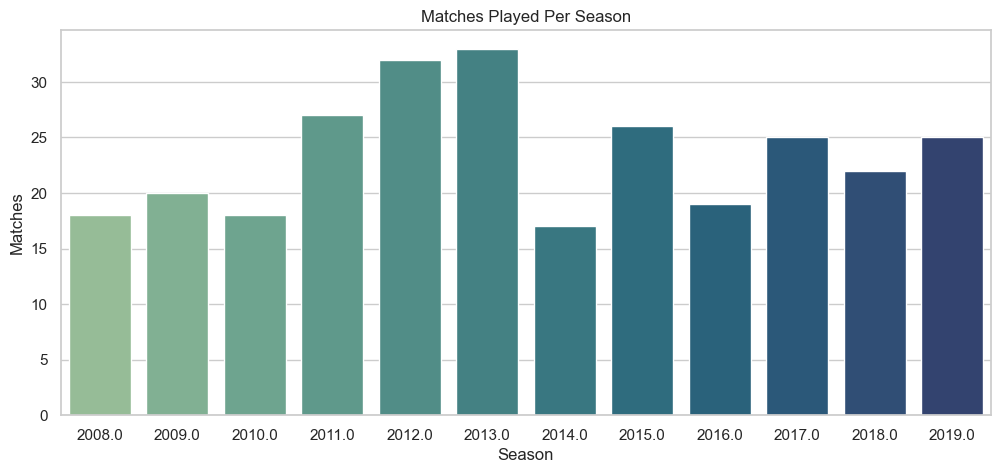

In [6]:
matches_per_season = matches['season'].value_counts().sort_index()
plt.figure(figsize=(12,5))
sns.barplot(x=matches_per_season.index, y=matches_per_season.values, palette='crest')
plt.title("Matches Played Per Season")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.show()


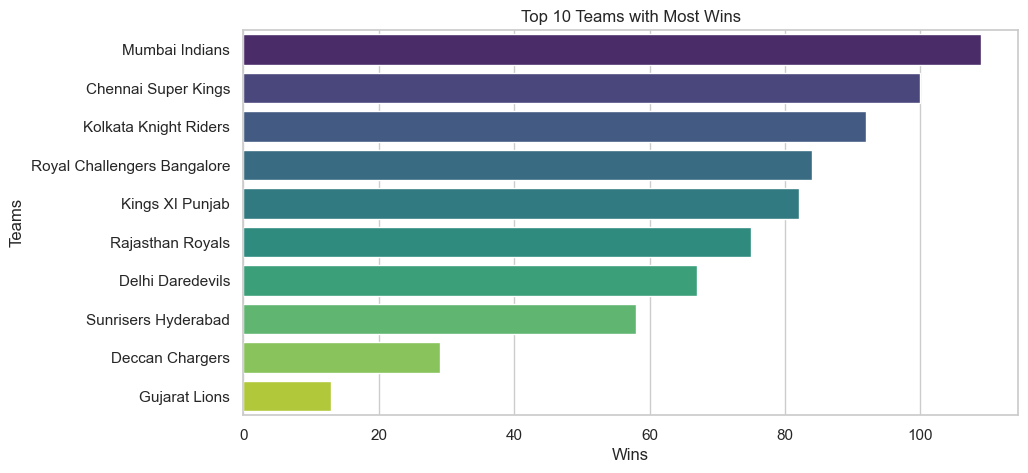

In [7]:
top_teams = matches['winner'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_teams.values, y=top_teams.index, palette='viridis')
plt.title("Top 10 Teams with Most Wins")
plt.xlabel("Wins")
plt.ylabel("Teams")
plt.show()


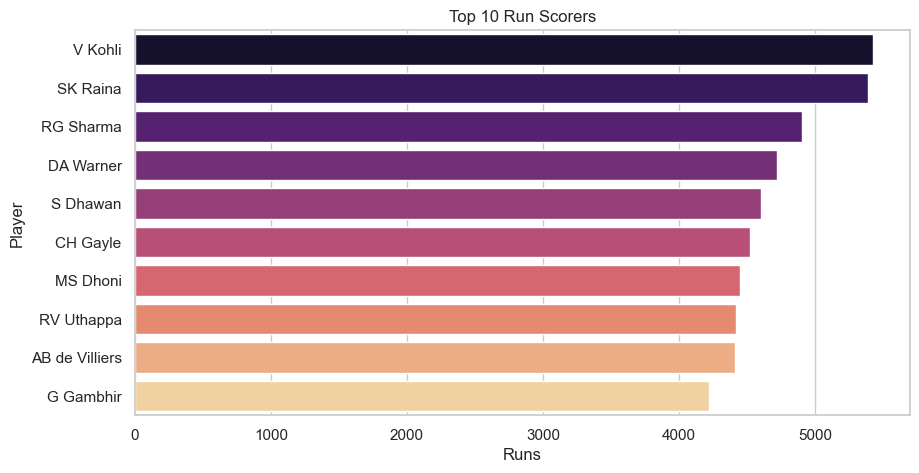

In [23]:
top_batsmen = runs_strike.sort_values(by='total_runs', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='total_runs', y='batsman', data=top_batsmen, palette='magma')
plt.title("Top 10 Run Scorers")
plt.xlabel("Runs")
plt.ylabel("Player")
plt.show()


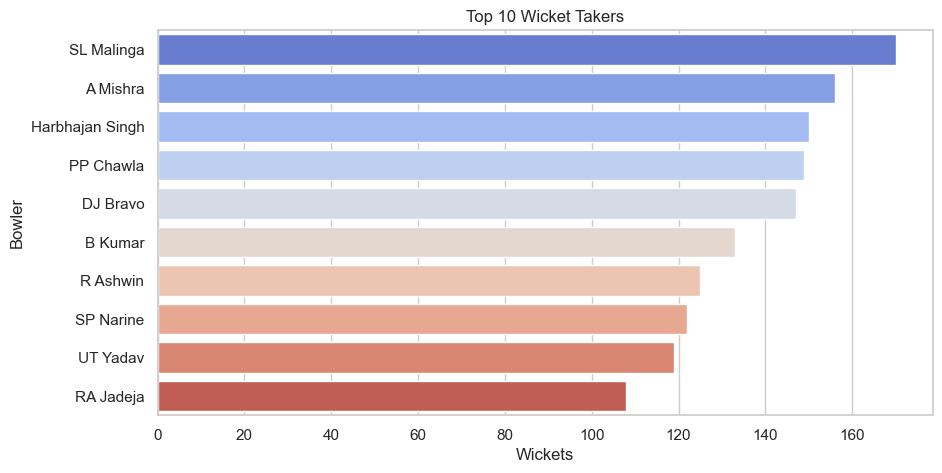

In [21]:
dismissals = ['bowled', 'caught', 'lbw', 'stumped', 'hit wicket', 'caught and bowled']
wickets = deliveries[deliveries['dismissal_kind'].isin(dismissals)]
top_bowlers = wickets['bowler'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='coolwarm')
plt.title("Top 10 Wicket Takers")
plt.xlabel("Wickets")
plt.ylabel("Bowler")
plt.show()


In [29]:
print(home_away.columns.tolist())


['team', 'home_wins', 'away_wins', 'home_matches', 'away_matches', 'home_win_percentage', 'away_win_percentage']


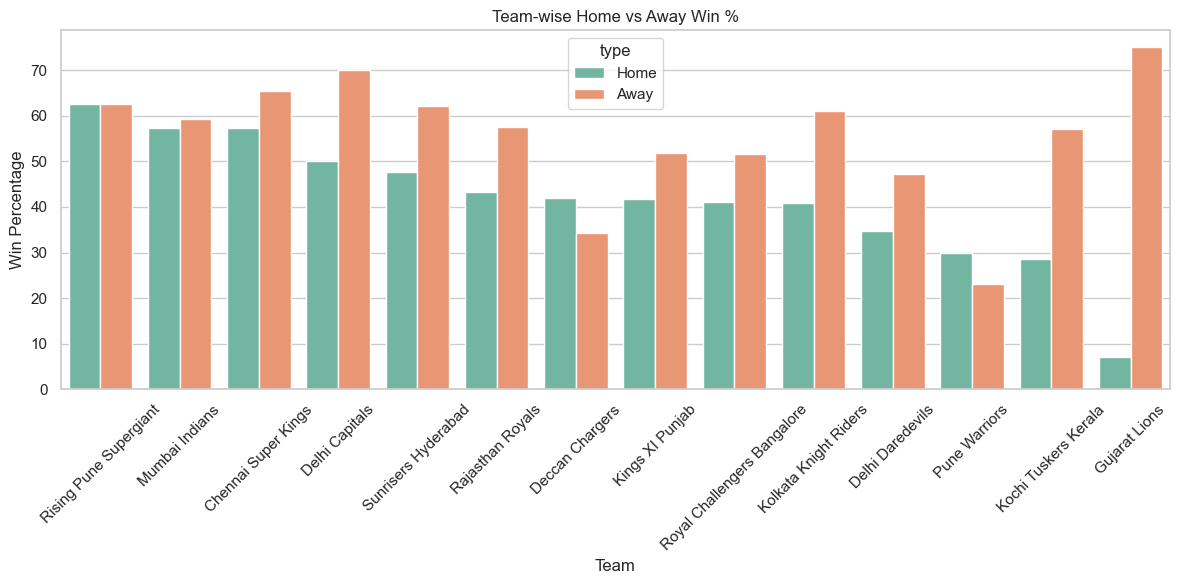

In [33]:
# Prepare DataFrame for plotting
home_df = home_away[['team', 'home_win_percentage']].copy()
home_df['type'] = 'Home'
home_df.rename(columns={'home_win_percentage': 'win_percentage'}, inplace=True)

away_df = home_away[['team', 'away_win_percentage']].copy()
away_df['type'] = 'Away'
away_df.rename(columns={'away_win_percentage': 'win_percentage'}, inplace=True)

# Combine home and away
combined = pd.concat([home_df, away_df])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=combined, x='team', y='win_percentage', hue='type', palette='Set2')
plt.title("Team-wise Home vs Away Win %")
plt.xlabel("Team")
plt.ylabel("Win Percentage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
# Standardize team names (optional)
matches['team1'] = matches['team1'].str.strip()
matches['team2'] = matches['team2'].str.strip()
